<a href="https://colab.research.google.com/github/sofiewong/muffin_chihuahua/blob/main/muffin_chihuahua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
from google.colab import drive
drive.mount('/content/gdrive/')
%cd "/content/gdrive/MyDrive/muffchi"

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
/content/gdrive/MyDrive/muffchi


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.utils.np_utils import to_categorical
import os
import cv2
import random

In [55]:
#load and resize all image from folder
def loadimg(folder):
  images = [];
  for filename in os.listdir(folder):
    img = cv2.imread(os.path.join(folder,filename))
    if img is not None:
      img = cv2.resize(img, (64, 64))
      images.append(img)
  return images

train_muffin_img = loadimg("/content/gdrive/MyDrive/muffchi/train/muffin")
train_chihuahua_img = loadimg("/content/gdrive/MyDrive/muffchi/train/chihuahua")
test_muffin_img = loadimg("/content/gdrive/MyDrive/muffchi/test/muffin")
test_chihuahua_img = loadimg("/content/gdrive/MyDrive/muffchi/test/chihuahua")

In [56]:
#create labels
class_names = {0:'muffin',1:'chihuahua'};
train_muffin_labels = np.full(len(train_muffin_img), 0)
test_muffin_labels = np.full(len(test_muffin_img), 0)
train_chihuahua_labels = np.full(len(train_chihuahua_img), 1)
test_chihuahua_labels = np.full(len(test_chihuahua_img), 1)

#combine labels and convert to numpy arrays
x = np.array(train_muffin_img + train_chihuahua_img + test_muffin_img + test_chihuahua_img)
y = np.concatenate((train_muffin_labels, test_muffin_labels, train_chihuahua_labels, test_chihuahua_labels),axis=0)

print(x.shape)
print(y.shape)


(5917, 64, 64, 3)
(5917,)


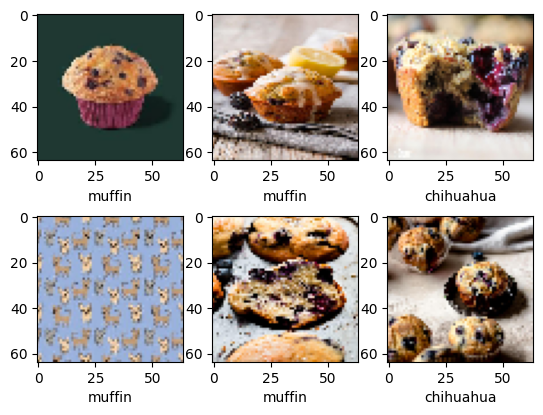

In [57]:
#show samples from images
for i in range(6):
  rnd = random.randint(0,len(y)-1)
  plt.subplot(2,3,i+1)
  plt.grid(False)
  plt.imshow(cv2.cvtColor(x[rnd], cv2.COLOR_BGR2RGB))
  plt.xlabel(class_names[y[rnd]])


In [58]:
# Normalize pixel values to range [0, 1]
x = x / 255.0

# One hot encoding
y = to_categorical (y, 2)

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [59]:
#Build CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 30, 30, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 30, 30, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 128)      

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='accuracy',patience=5, mode='max')
history = model.fit(x_train, y_train, batch_size=32, epochs=100,callbacks=[early_stopping], validation_split=0.2,verbose=1)

# Evaluate the model on test data
loss, accuracy = model.evaluate(x_test, y_test)
losstr, accuracytr = model.evaluate(x_train, y_train)

# Save the trained model
model.save("muffin_chihuahua_model.h5")

Epoch 1/100
119/119 [==============================] - 193s 2s/step - loss: 1.3618 - accuracy: 0.6070 - val_loss: 0.7286 - val_accuracy: 0.5385
Epoch 2/100
119/119 [==============================] - 172s 1s/step - loss: 0.6356 - accuracy: 0.6989 - val_loss: 0.7988 - val_accuracy: 0.5628
Epoch 3/100
119/119 [==============================] - 172s 1s/step - loss: 0.5296 - accuracy: 0.7493 - val_loss: 1.0719 - val_accuracy: 0.4995
Epoch 4/100
119/119 [==============================] - 173s 1s/step - loss: 0.4725 - accuracy: 0.7813 - val_loss: 0.7337 - val_accuracy: 0.6389
Epoch 5/100
119/119 [==============================] - 180s 2s/step - loss: 0.3909 - accuracy: 0.8262 - val_loss: 0.8055 - val_accuracy: 0.6663
Epoch 6/100
119/119 [==============================] - 174s 1s/step - loss: 0.3070 - accuracy: 0.8666 - val_loss: 0.9291 - val_accuracy: 0.6357
Epoch 7/100
119/119 [==============================] - 184s 2s/step - loss: 0.2444 - accuracy: 0.9020 - val_loss: 0.8785 - val_accuracy:

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=1)

print("test accuracy: " + str(test_acc))

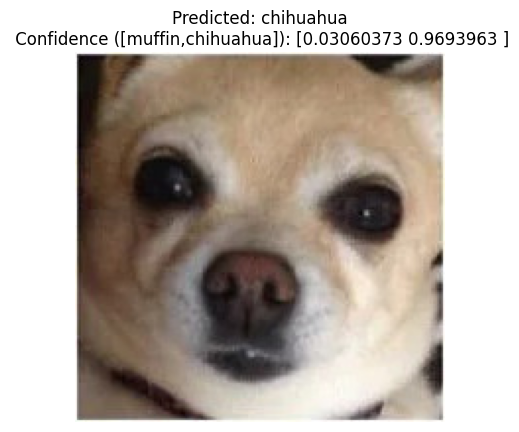

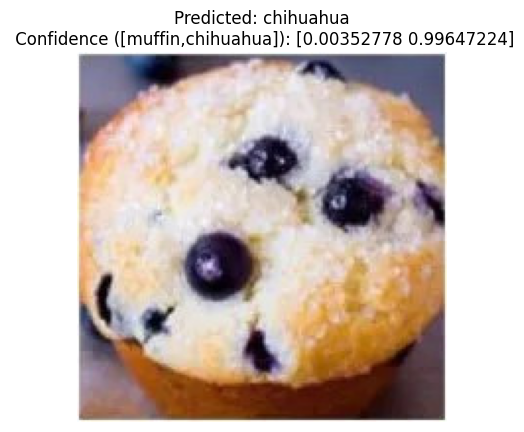

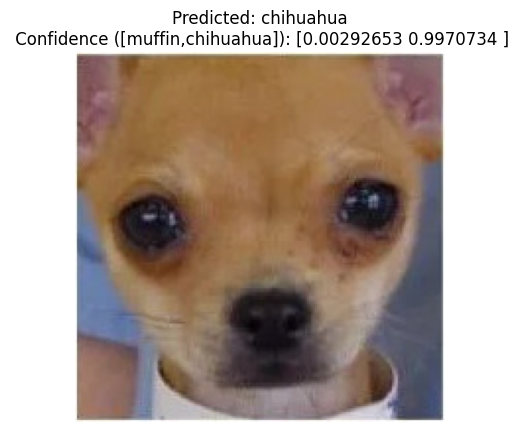

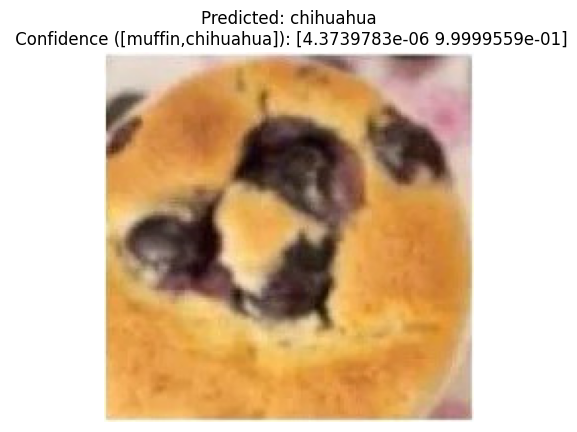

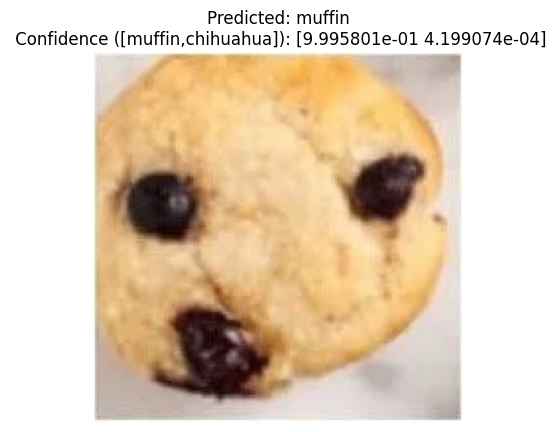

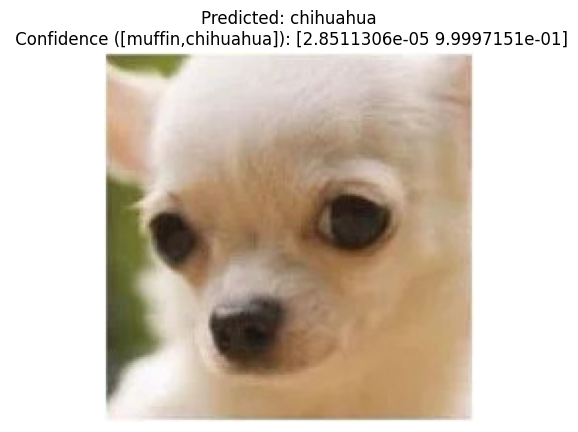

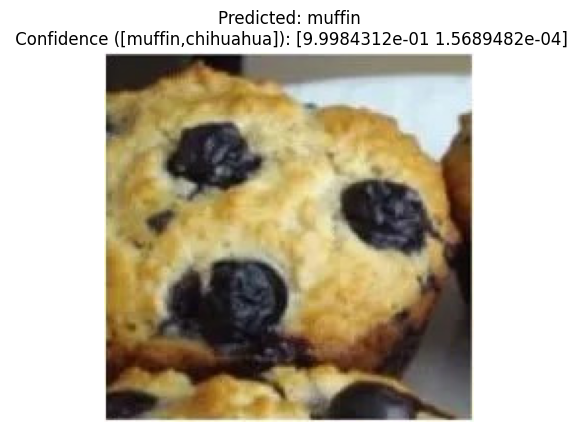

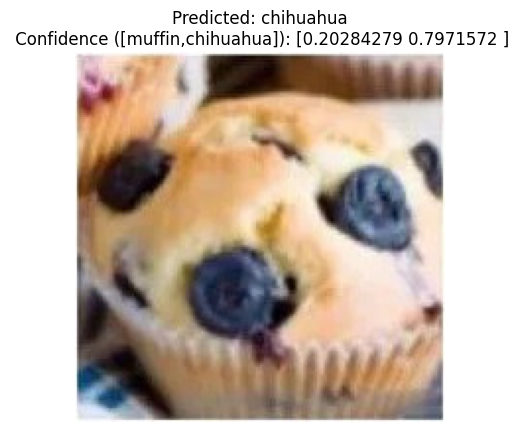

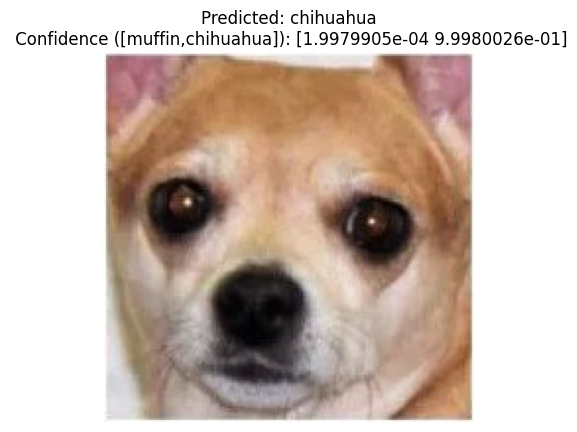

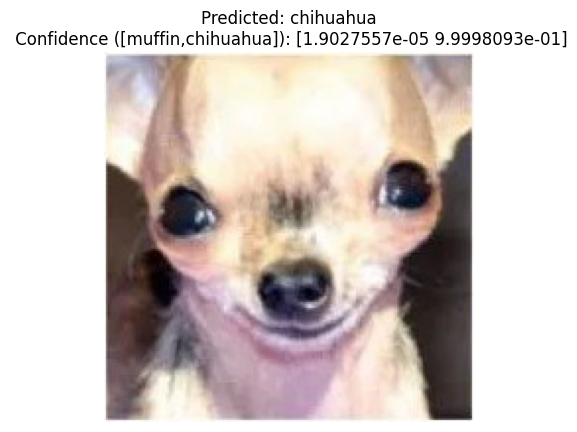

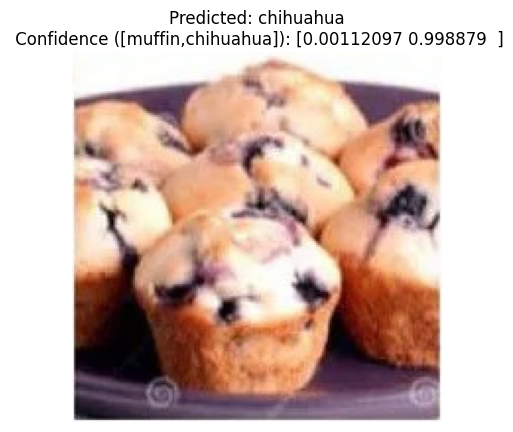

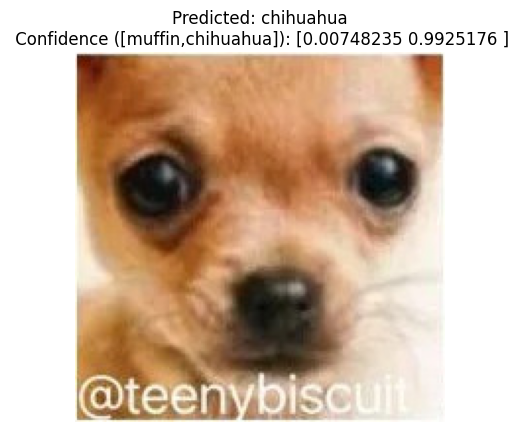

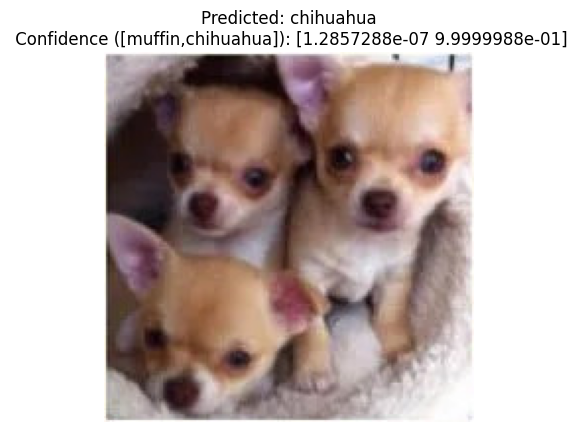

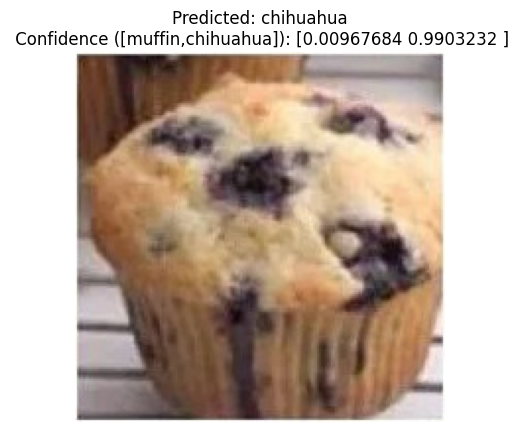

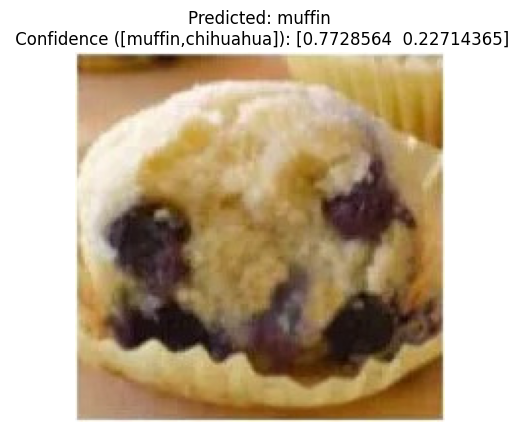

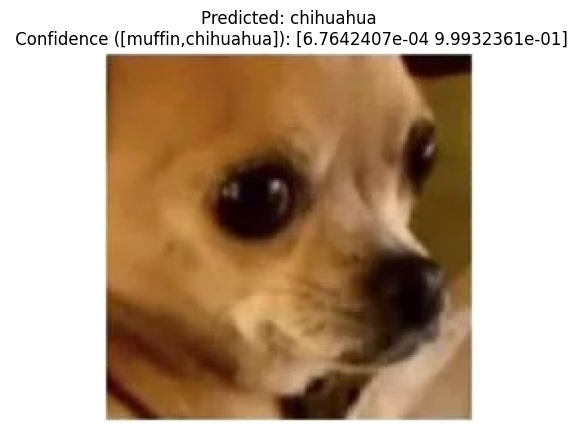

In [64]:
#testing model on confusing muffin and chihuahua pictures found on here https://twitter.com/teenybiscuit/status/707727863571582978
folder= "/content/gdrive/MyDrive/muffchi/custom"

for filename in os.listdir(folder):
    display_img = cv2.imread(os.path.join(folder,filename))
    if display_img is not None:
      custom_img = cv2.resize(display_img, (64, 64))
      custom_img = custom_img/255.0

      # Reshape the image to match the model input shape
      custom_img = np.expand_dims(custom_img, axis=0)
      custom_img = np.expand_dims(custom_img, axis=-1)


      # Make predictions on the custom image
      prediction = model.predict(custom_img,verbose=0)
      prediction_prob = prediction[0]

      pred_label = np.argmax(prediction[0])
      pred_class = class_names[pred_label]

      plt.imshow(cv2.cvtColor(display_img, cv2.COLOR_BGR2RGB))
      plt.title(f"Predicted: {pred_class}\n Confidence ([muffin,chihuahua]): {prediction_prob}")
      plt.axis('off')  # Hide axes
      plt.show()
